In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import chardet
import json

import graphviz as gr

import pickle 
import econml   ## install package using cmd 
import dowhy    ## install using cmd 
from dowhy import CausalModel
from IPython.display import Image, display 

import statistics
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import mannwhitneyu, ks_2samp
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
from termcolor import colored

from sklearn import datasets
import statsmodels.formula.api as sm
import econtools.metrics as mt

# 1 Causal Inference

 Causal inference is the leveraging of theory and deep knowledge of institutional details to estimate the impact of events and choices on a given outcome of interest. In the field of economics, we find data from experimental studies or observational data. Each of them presents its own challenges to estimate unbiased causal effect.
 
 ## 1.1 The challenging to identify causal effect: correlation is not causation

#### Confunding bias: treatment and the outcome shares a common cause

Take the following example, since the beginning of the last century there has been much debate about the cause of the sustained increase in lung cancer. Initial data indicated that there was a statistical association between smoking and lung cancer. But ¿how test that causal hypothesis?. Even more so if some doctors argued that genetic factors affects smoking as well as lung cancer independently.This is presented in the following Directed Acyclic Graphs:

Change in genetic factors alters the probability of smoking and, at the same time, the development of cancer. In this way, the relationship between smoking and developing lung cancer would be a spurious correlation or non-causal correlation.

The genetic factor variable is called a confounder because. Confounder varaible opens a backdoor-path that creates a non-causal correlation between variables. If the confounding variables are not taken into account, the estimated causal effect will be biased due to the omission of variables. Confounder variables can be observable or unobservable as in the example. The case of an observable confounder would be the education of the parents in the relationship between years of education and labor income.

$ Smoking \rightarrow Lung \ \ Cancer$ Directed causal effect

$ Genetic \ \ factors \rightarrow  Smoking \rightarrow Lung \ \ Cancer$ Backdoor-path indirected causal effect



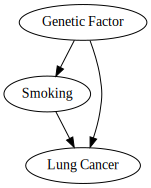

In [2]:
g = gr.Digraph()

g.edge("Genetic Factor", "Smoking"),
g.edge("Genetic Factor", "Lung Cancer"),
g.edge("Smoking", "Lung Cancer")
g

#### Collider bias: treatment and the outcome shares a common effects

Imagine that with the help of some miracle you are finally able to randomize education in order to measure its effect on wage. But just to be sure you won’t have confounding, you control for a lot of variables, one of them investment. But investment is a common effect that it's called collider.  By conditioning on investment, you are opening a second path between the treatment and the outcome, which will make bias causal effect.

$ Education \rightarrow Labor \ \ Income$ Directed causal effect

$ Education \rightarrow  Investment \ ; \ Labor \ \ income \rightarrow Investment $ Backdoor-path indirected causal effect

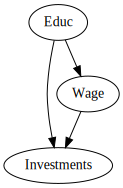

In [3]:
g = gr.Digraph()

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

Additional example:

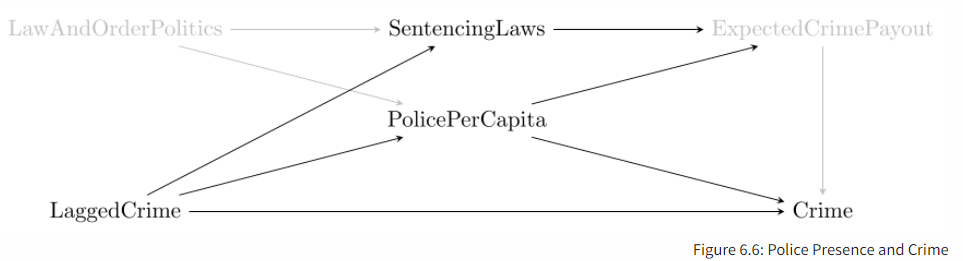

# 2. Potencial outcomes $Y_i^1 \ \ Y_i^0  $

$D_i$ is a binary variable that takes on a value of 1 if a particular unit i  receives the treatment and a 0 if it does not. Each unit will have two potential outcomes, but only one observed outcome. Potential outcomes are defined as $Y_i^1$  if unit   received the treatment and as $Y_i^0$  if the unit did not. 

 A unit’s observable outcome is a function of its potential outcomes determined according to the switching equation
 
 $$ Y_i = Y_i^1 + (1-D_i)*Y_i^0 $$
 
 The unit-specific treatment effect as the difference between the two states of the world:

$$ \delta_i = Y_i^1 - Y_i^0 $$

This requires knowing two states of the world, but we observe only one. Hence, we cannot calculate the unit treatment effect: "counterfactual problem".


## 2.1 Average treatment effect
Difference on population expected means in two states of the world.

$$ ATE = E[\delta_i] = E[Y_i^1] - E[Y_i^0] $$

We have to estimate ATE because we just one state if the world. We need to find a valid counterfactual.

### How estiamte ATE

$$ ATE = E[Y^1_i | T =1 ] - E[Y^0_i | T =0 ]$$

$$ ATE = ( E[Y^1_i | T =1 ]  - E[Y^0_i | T =1 ] ) + E[Y^0_i | T =1 ]-  E[Y^0_i | T =0 ]  $$ 

$$ ATE = ATET + E[Y^0_i | T =1 ]-  E[Y^0_i | T =0 ] = ATET + (selection \ \ bias)  $$ 

### 2.1.1 Independece Asumption

$$ (Y^1,Y^0) \ \ | \ \ T $$

Potencial outcome are not correlated to treatment. This eliminates selection bias. In other word, treated and untreated unites are comparable. 

### 2.1.2 SUTVA asumption ( stable unit treatment value assumption)

It implies two things: the treatment is homogeneous between the treated units and there is no spillobes effect. That is, there are no untreated units that receive treatment

## 2.2 Random Control Trails (RCT)

 Randomised Experiments. Randomised experiments consist of randomly assigning individuals in a population to a treatment or to a control group. 
 
Randomisation annihilates bias by making the potential outcomes independent of the treatment. Both groups are comparable into observable and non-observable variables.
 
 $$ ATE = ATET + (selection \ \ bias) = ATET $$
 


## 2.3 Internal and external validity:
Random selection keeps características from population (external validity). 
In a similar way, RCT keeps treatment and control group caracteristics (internal validity). Once treatment, both groups are affected by same external factors. Treatment is the unique difference in both groups. RCT overcome selection bias: accurate estimate of contrafactual. 

External validity let to extrapolate or generalized conclusion from sample evaluation to la población de unidades elegibles or targeret popultaion.

## 3 A/B test

Randomized experimentation process where in two or more versions of a variable (web page, page element, etc.) are shown to different segments of website visitors at the same time to determine which version leaves the maximum impact and drive business metrics.



## A/B test application

An ecommerce company used the following strategy: assign discount benefits on online purchases to its customers randomly. The notice of benefits will appear in the user's virtual account. This strategy is applied for one year. 

The objective of the work is to evaluate the causal effect of the marketing strategy. Does the strategy manage to increase sales? Does the marketing strategy increase sales in a sustained manner?

In [4]:
# Uplaoad base from marketing strategies 

base = open(r'../_data/ABtest/abtest.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

base1 = pd.read_csv( r'../_data/ABtest/abtest.csv', encoding = charenc)
base1 

,user_id,signup_month,month,spend,treatment
0,0,8,1,511,True
1,0,8,2,471,True
2,0,8,3,465,True
3,0,8,4,479,True
4,0,8,5,429,True
...,...,...,...,...,...
119995,9999,8,8,399,True
119996,9999,8,9,488,True
119997,9999,8,10,524,True
119998,9999,8,11,494,True


In [5]:
base = base1.replace({True: 1, False: 0})
base.dtypes

user_id         int64
signup_month    int64
month           int64
spend           int64
treatment       int64
dtype: object

In [6]:
# The function and bucle allows to identify the benefits per month and accumulated sales. 

def causal_signup_month(a,i,j):
    data = a[(a.signup_month == i) | (a.signup_month == 0)]
    data = data[(data.month >= i) & (data.month <= i+j)]
    data = data.groupby(['user_id'], as_index=False)['spend','treatment'].sum()
    data['treatment'] =  data['treatment']/(j+1)
    return data


for j in range(1,12):
    for i in range(1,12):
        globals()[f'base_{i}_{j+1}'] = causal_signup_month(base,i,j)

In [7]:
# total sales under two months of treatment for the beneficiary clients on (February)
# sales under treatment (February and march)

base_2_2

,user_id,spend,treatment
0,1,926,0.0
1,2,922,0.0
2,3,1010,1.0
3,4,958,0.0
4,9,945,0.0
...,...,...,...
5458,9990,999,0.0
5459,9992,918,0.0
5460,9995,940,0.0
5461,9996,992,0.0


In [8]:
# total sales under three months of treatment for the beneficiary clients on June
# months under treatment (June, July and August)

base_6_3

,user_id,spend,treatment
0,1,1296,0.0
1,2,1296,0.0
2,4,1285,0.0
3,6,1500,1.0
4,9,1311,0.0
...,...,...,...
5472,9993,1589,1.0
5473,9995,1241,0.0
5474,9996,1308,0.0
5475,9997,1504,1.0


In [9]:
# Kolmorogov - Smirnov Test: independent sample from common population distribution f(X)

ks_2samp(base_2_2['spend'][base_2_2.treatment == 1], base_2_2['spend'][base_2_2.treatment == 0])

# H0: samples come from same population distribution
# Pvalues is less than 5%, therefore the null hypothesis that both samples come from the same distribution is rejected.

KstestResult(statistic=0.8733908806150343, pvalue=2.1094237467877974e-15)

In [10]:
test_1 = base_2_2.groupby("treatment")['spend'].agg(["count","mean","std","median","min","max"])
test_1 

# Mean are different in both group

,count,mean,std,median,min,max
treatment,,,,,,
0.0,5006,949.386536,32.057687,949.0,819,1058
1.0,457,1047.463895,32.159405,1047.0,961,1150


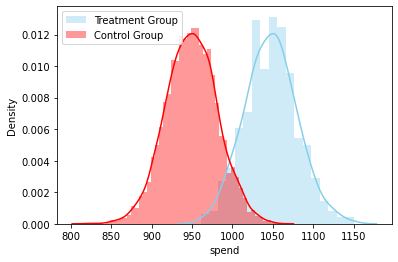

In [11]:
sns.distplot( base_2_2['spend'][base_2_2.treatment == 1] , color="skyblue", label="Treatment Group")
sns.distplot( base_2_2['spend'][base_2_2.treatment == 0] , color="red", label="Control Group")
plt.legend()
plt.show()

# Different densities corroborated the first test

[Text(0, 0, 'Control group'), Text(1, 0, 'Treatment group')]

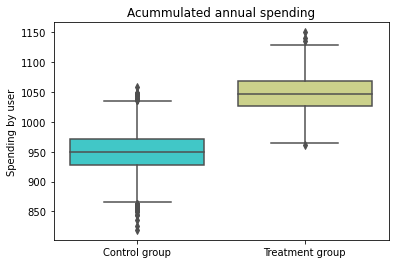

In [12]:
box = sns.boxplot(x="treatment", y="spend", data = base_2_2, palette='rainbow')
plt.ylabel('Spending by user')
plt.xlabel('')
plt.title('Acummulated annual spending')
(box.set_xticklabels(["Control group", "Treatment group"]))

In [13]:

jb1 = stats.jarque_bera(base_2_2["spend"][base_2_2.treatment == 1])
jb2 = stats.jarque_bera(base_2_2["spend"][base_2_2.treatment == 0])
print(jb1)
print(jb2)
# H0: samples come from Normal distribution

# Pvalues is larger than 5%, even 10%,, therefore, the null hypothesis that the
# samples were drawn from a normal distribution is not rejected.

Jarque_beraResult(statistic=1.091376574889451, pvalue=0.5794428228359494)
Jarque_beraResult(statistic=0.9621851872678202, pvalue=0.6181076822167018)


In [14]:
 t_value, t_test_p = stats.ttest_ind(base_2_2["spend"][base_2_2.treatment == 1], 
                                     base_2_2["spend"][base_2_2.treatment == 0], equal_var=False)
    
print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
# H0: samples come from same population distribution
# Non-parametric test that corroborates that both samples come from different distributions because p-vales is less 5%. 

t_value = 62.426, t_test_p = 0.000 



In [15]:
t_value, t_test_p = stats.mannwhitneyu(base_2_2["spend"][base_2_2.treatment == 1], base_2_2["spend"][base_2_2.treatment == 0])
print('statistics-t = %.3f, P_value= %.3f' % (t_value, t_test_p),"\n")

# H0: mean(y)treatment = mean(y)control
#  p-vales is less 5%, hence H0 is rejected. The average sales of both groups is statistically different.

statistics-t = 2254562.000, P_value= 0.000 



In [16]:
mod = sm.ols('spend ~ treatment', data=base_2_2)
res = mod.fit()
print(res.summary())

# For the beneficiaries of the month of February, the first two months undrer treatment increased sales by 98.07 dollars compared to the non-beneficiary group. 
# This result is statistically significant at the 95% confidence level.
# the coefficient does not present important bias since the treatment and control groups are statistically comparable.
# Hence, no bias due to omission of relevant variables

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     3918.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:41:51   Log-Likelihood:                -26695.
No. Observations:                5463   AIC:                         5.339e+04
Df Residuals:                    5461   BIC:                         5.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    949.3865      0.453   2094.793      0.0

In [17]:
def abtest(base):

    print(colored("Kolmorogov - Smirnov Test","cyan", attrs=["bold"]),"\n")
    t_value, t_test_p = ks_2samp(base['spend'][base.treatment == 1], base['spend'][base.treatment == 0])
    print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
    
    print(colored("Summary Statistics","cyan", attrs=["bold"]),"\n")
    test_1 = base.groupby("treatment")['spend'].agg(["count","mean","std","median","min","max"])
    print(test_1, "\n")
    
    print(colored("Jarque Bera Normality Test","cyan", attrs=["bold"]),"\n")
    jb1 = stats.jarque_bera(base["spend"][base.treatment == 1])
    jb2 = stats.jarque_bera(base["spend"][base.treatment == 0])
    print(f'Jarque Bera (treatment group): {jb1}', "\n")
    print(f'Jarque Bera (control group):  {jb2}', "\n")

    print(colored("Mann Whitney U Non parametric - Test","cyan", attrs=["bold"]),"\n")
    t_value, t_test_p = stats.mannwhitneyu(base["spend"][base.treatment == 1], base["spend"][base.treatment == 0])
    print('statistics-t = %.3f, P_value= %.3f' % (t_value, t_test_p),"\n")

    print(colored("T-test mean","cyan", attrs=["bold"]),"\n")
    t_value, t_test_p = stats.ttest_ind(base["spend"][base.treatment == 1], 
                                     base["spend"][base.treatment == 0], equal_var=False)
    print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
    
    print(colored("Densities Plot analysis", "cyan", attrs=["bold"]),"\n")
    sns.distplot( base['spend'][base.treatment == 1] , color="darkblue", label="Treatment Group")
    sns.distplot( base['spend'][base.treatment == 0] , color="red", label="Control Group")
    plt.legend()
    plt.show()

    print(colored("Regression analysis", "cyan", attrs=["bold"]),"\n")
    mod = sm.ols('spend ~ treatment', data=base)
    res = mod.fit()
    print(res.summary(),"\n")
    
    print(colored("Pox Plot analysis", "cyan", attrs=["bold"]),"\n")
    box = sns.boxplot(x="treatment", y="spend", data= base, palette='rainbow')
    plt.ylabel('Annual Spending by user')
    plt.xlabel('')
    plt.title('Box per Annual spending')
    (box.set_xticklabels(["Control group", "Treatment group"]))

Kolmorogov - Smirnov Test 

t_value = 0.873, t_test_p = 0.000 

Summary Statistics 

           count         mean        std  median  min   max
treatment                                                  
0.0         5006   949.386536  32.057687   949.0  819  1058
1.0          457  1047.463895  32.159405  1047.0  961  1150 

Jarque Bera Normality Test 

Jarque Bera (treatment group): Jarque_beraResult(statistic=1.091376574889451, pvalue=0.5794428228359494) 

Jarque Bera (control group):  Jarque_beraResult(statistic=0.9621851872678202, pvalue=0.6181076822167018) 

Mann Whitney U Non parametric - Test 

statistics-t = 2254562.000, P_value= 0.000 

T-test mean 

t_value = 62.426, t_test_p = 0.000 

Densities Plot analysis 



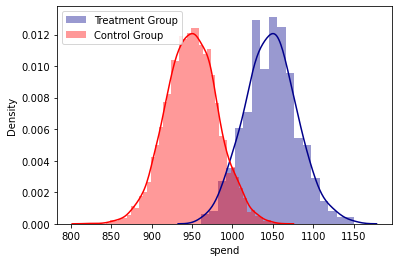

Regression analysis 

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     3918.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:41:52   Log-Likelihood:                -26695.
No. Observations:                5463   AIC:                         5.339e+04
Df Residuals:                    5461   BIC:                         5.341e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    949.3865      0.4

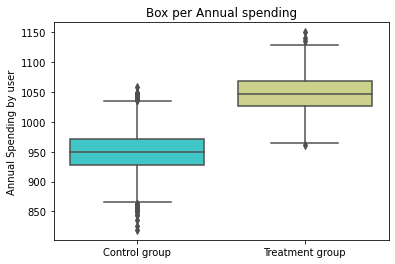

In [18]:
abtest(base_2_2)

In [19]:
#Positive causal effect of the marketing strategy over time

coef = pd.DataFrame(columns=('months','causal_effect', 'lower','upper'))
                    
for j in range(2,12):
    mod = sm.ols('spend ~ treatment', data=globals()[f'base_2_{j}'])
    res = mod.fit()
    coef.loc[j-2,'lower']=res.conf_int(alpha=0.05, cols=None)[0][1]
    coef.loc[j-2,'upper']=res.conf_int(alpha=0.05, cols=None)[1][1]
    coef.loc[j-2,'causal_effect']=res.params[1]
    coef.loc[j-2,'months']= j

coef


,months,causal_effect,lower,upper
0,2,98.077359,95.005482,101.149236
1,3,198.97023,195.249432,202.691028
2,4,299.287842,295.014514,303.56117
3,5,400.08003,395.333792,404.826269
4,6,500.627491,495.414822,505.840161
5,7,602.782273,597.151287,608.413259
6,8,703.938904,697.942304,709.935505
7,9,805.135222,798.744774,811.525669
8,10,905.176931,898.50055,911.853311
9,11,1005.810219,998.792173,1012.828265


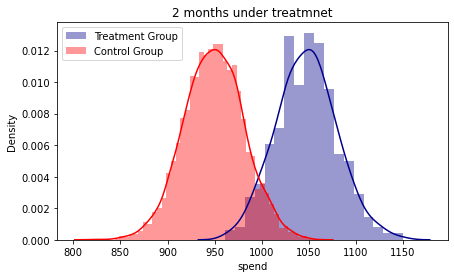

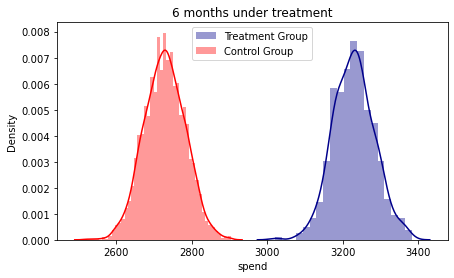

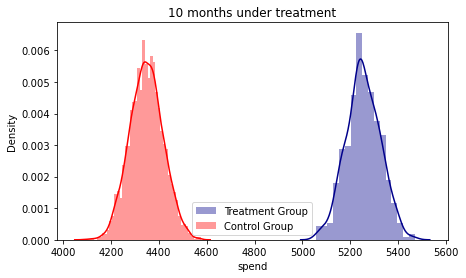

In [20]:
    fig, axes = plt.subplots(figsize=(7, 4))                             
    ax1 = sns.distplot( base_2_2['spend'][base_2_2.treatment == 1] , color="darkblue", label="Treatment Group")
    ax1 = sns.distplot( base_2_2['spend'][base_2_2.treatment == 0] , color="red", label="Control Group")
    plt.title('2 months under treatmnet')
    plt.legend()
    
    fig, ax = plt.subplots(figsize=(7, 4))  
    ax2 = sns.distplot( base_2_6['spend'][base_2_6.treatment == 1] , color="darkblue", label="Treatment Group")
    ax2 = sns.distplot( base_2_6['spend'][base_2_6.treatment == 0] , color="red", label="Control Group")
    plt.title('6 months under treatment')
    plt.legend()
    
    fig, ax = plt.subplots(figsize=(7, 4))  
    ax3 = sns.distplot( base_2_10['spend'][base_2_10.treatment == 1] , color="darkblue", label="Treatment Group")
    ax3 = sns.distplot( base_2_10['spend'][base_2_10.treatment == 0] , color="red", label="Control Group")
    plt.title('10 months under treatment')
    plt.legend()
    
    #The densities show an increasing gap according to the months accumulated under the treatment.
    #Treatment clients on february

Kolmorogov - Smirnov Test 

t_value = 1.000, t_test_p = 0.000 

Summary Statistics 

           count         mean        std  median   min   max
treatment                                                   
0.0         5006  4728.382341  73.222369  4728.0  4456  4988
1.0          457  5734.192560  73.657384  5737.0  5525  5970 

Jarque Bera Normality Test 

Jarque Bera (treatment group): Jarque_beraResult(statistic=0.46531521621766186, pvalue=0.7924248469227051) 

Jarque Bera (control group):  Jarque_beraResult(statistic=0.6594857909580949, pvalue=0.7191085957374604) 

Mann Whitney U Non parametric - Test 

statistics-t = 2287742.000, P_value= 0.000 

T-test mean 

t_value = 279.577, t_test_p = 0.000 

Densities Plot analysis 



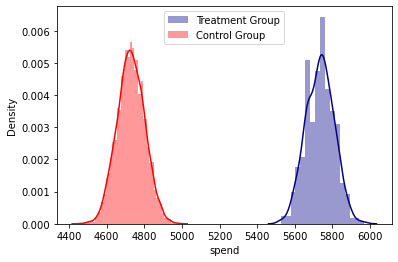

Regression analysis 

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 7.894e+04
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:41:56   Log-Likelihood:                -31209.
No. Observations:                5463   AIC:                         6.242e+04
Df Residuals:                    5461   BIC:                         6.243e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4728.3823      1.0

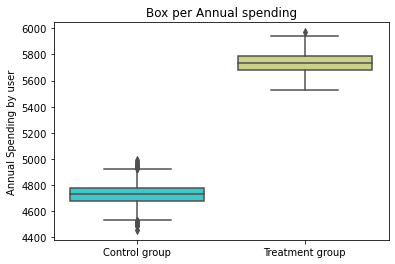

In [21]:
base_2_10 = causal_signup_month(base,2,10)

# AB test for ten months under treatment for the beneficiary clients on February
abtest(base_2_10)

In [22]:
#Placebo Test: Treatment groups are artificially created from control group. 
# Beneficiary units are randomly selected from the control group

# artificial beneficiary clients of february
j = 2

pbo_base0 = base[base.treatment == 0].drop('treatment', axis =1)
pbo_base1 = pbo_base0.drop_duplicates(subset=['user_id'])

pbo_base1 = pbo_base1.sample(frac=0.25, replace=False, random_state=100)
pbo_base1 = pbo_base1[['user_id']]
pbo_base1['treatment'] = 1

placebo_base =  pd.merge(pbo_base0, pbo_base1, how="left", on=["user_id"])
placebo_base['treatment'] = placebo_base['treatment'].fillna(0)
placebo_base.loc[placebo_base.treatment == 1, 'signup_month'] = j
globals()[f'placebo_base_{j}'] = placebo_base


# first two months under treatment for february artifical benficiaries
placebo_2_2 = causal_signup_month(placebo_base_2,2,1)

placebo_base_2.describe()

,user_id,signup_month,month,spend,treatment
count,60072.000000,60072.000000,60072.000000,60072.000000,60072.000000
mean,4972.272473,0.500200,6.500000,434.853443,0.250100
std,2890.220110,0.866148,3.452081,41.062485,0.433074
min,1.000000,0.000000,1.000000,286.000000,0.000000
25%,2448.000000,0.000000,3.750000,404.000000,0.000000
50%,5010.000000,0.000000,6.500000,435.000000,0.000000
75%,7475.000000,2.000000,9.250000,466.000000,1.000000
max,9998.000000,2.000000,12.000000,566.000000,1.000000


Kolmorogov - Smirnov Test 

t_value = 0.019, t_test_p = 0.867 

Summary Statistics 

           count        mean        std  median  min   max
treatment                                                 
0.0         3754  949.257326  32.146578   949.5  819  1058
1.0         1252  949.773962  31.799294   949.0  844  1048 

Jarque Bera Normality Test 

Jarque Bera (treatment group): Jarque_beraResult(statistic=0.8424322407805398, pvalue=0.6562482574525232) 

Jarque Bera (control group):  Jarque_beraResult(statistic=2.533146164438472, pvalue=0.2817956595520943) 

Mann Whitney U Non parametric - Test 

statistics-t = 2371435.000, P_value= 0.628 

T-test mean 

t_value = 0.496, t_test_p = 0.620 

Densities Plot analysis 



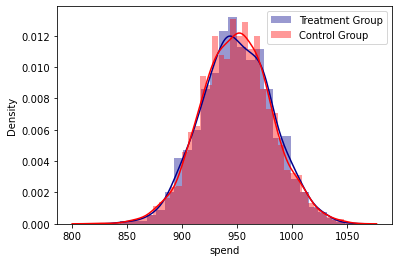

Regression analysis 

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2438
Date:                Sat, 05 Feb 2022   Prob (F-statistic):              0.621
Time:                        11:41:57   Log-Likelihood:                -24461.
No. Observations:                5006   AIC:                         4.893e+04
Df Residuals:                    5004   BIC:                         4.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    949.2573      0.5

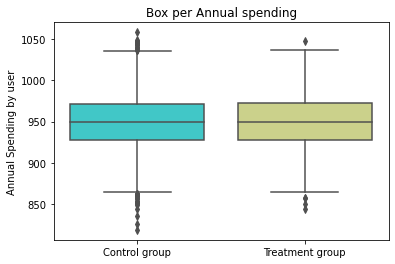

In [23]:
#Placebo test for artificial beneficiary group on february

abtest(placebo_2_2)

#It can be seen that both groups are statistically equal. 
# There is no evidence that the artificial treatment group has increased their purchases.

## References

### Causal inference
https://towardsdatascience.com/causal-inference-962ae97cefda

https://towardsdatascience.com/a-practical-guide-to-a-b-tests-in-python-66666f5c3b02

https://mixtape.scunning.com/introduction.html

https://theeffectbook.net/introduction.html

### A/B test

https://www.kaggle.com/babyoda/a-b-testing-in-practice

https://towardsdatascience.com/ab-testing-with-python-e5964dd66143

https://www.kaggle.com/ekrembayar/a-b-testing-step-by-step-hypothesis-testing